In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import exploration_modules as expo
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(expo)

<module 'exploration_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\exploration_modules.py'>

In [3]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# set configuration
sample_size, nr_sample, nr_moments = 20, 10, 5
n_folds = 5

In [5]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [6]:
moments_df = dem.get_moments(bounded_samples, nr_moments)

In [7]:
# setting values for cross validation
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,11))

In [8]:
data = moments_df
cost = [0.01, 0.25, 1, 5, 10]
gamma = [0.01, 0.25, 1, 5, 10]

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
skf = StratifiedKFold(n_splits = n_folds)
train_index_list = list()
test_index_list = list()
for train_index, test_index in skf.split(X, y):
    train_index_list.append(train_index)   
    test_index_list.append(test_index) 

In [21]:
result = list()
for c in cost:
    for g in gamma:
        for i in range(n_folds):
            X_train = X.iloc[train_index_list[i]]
            X_test = X.iloc[test_index_list[i]]
            y_train = y.iloc[train_index_list[i]]
            y_test = y.iloc[test_index_list[i]]
            y_train_reset_index = y_train.reset_index(drop=True)

            # standardize the data
            scaler_train = StandardScaler()
            scaler_train.fit(X_train)
            X_train_scaled = scaler_train.transform(X_train)
            X_test_scaled = scaler_train.transform(X_test)

            clf_svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced', C=c, gamma=g))
            clf_svm.fit(X_train, y_train)
            prob = clf_svm.predict_proba(X_train)
            loss = 0
            for j in range(len(prob)):
                k = prob.argmax(axis=1)[j]
                l = prob.max(axis=1)[j]
                if clf_svm.classes_[k] != y_train_reset_index[j]:
                    loss = -np.log(l) + loss
              
            result.append( dict(zip(['fold','cost','gamma','loss'],[i,c, g, loss])))
            result_df = pd.DataFrame(result)

<AxesSubplot:xlabel='cost', ylabel='loss'>

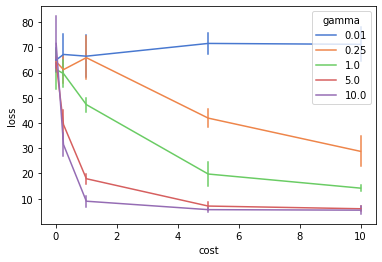

In [23]:
sns.lineplot(data = result_df, x='cost',y='loss', hue='gamma', ci = 'sd', err_style='bars',legend='full', palette='muted')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
param_grid = [{'C':[0.01, 0.25, 1, 5, 10],'gamma':[0.01, 0.25, 1, 5, 10], 'kernel':['rbf','linear']},]
optimal_params = GridSearchCV(SVC(), param_grid, cv=n_folds, verbose=0)
optimal_params.fit(X_train, y_train)
cost = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']

In [13]:
optimal_params.best_params_

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [22]:
grid_search_res=pd.DataFrame(optimal_params.cv_results_)
grid_search_res[['param_C','param_gamma','param_kernel','mean_test_score','rank_test_score']].sort_values('rank_test_score')

,param_C,param_gamma,param_kernel,mean_test_score,rank_test_score
48,10,10,rbf,0.831111,1
46,10,5,rbf,0.786667,2
38,5,10,rbf,0.786667,2
36,5,5,rbf,0.682222,4
44,10,1,rbf,0.620000,5
28,1,10,rbf,0.600000,6
34,5,1,rbf,0.540000,7
26,1,5,rbf,0.540000,7
49,10,10,linear,0.540000,7
41,10,0.01,linear,0.540000,7
